In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


# Data Exploration

## Class distridution

There is a noticeable imbalance of objects in classes

<Axes: >

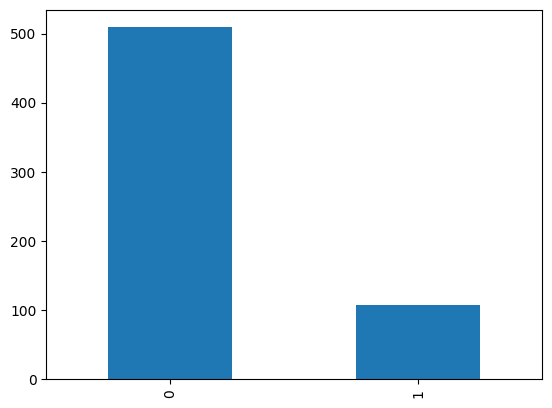

In [6]:
df_train['Class'].value_counts().plot.bar()

## EJ distribution

A single column that has categorical data - EJ column. There is also an imbalance, but less pronounced.

<Axes: >

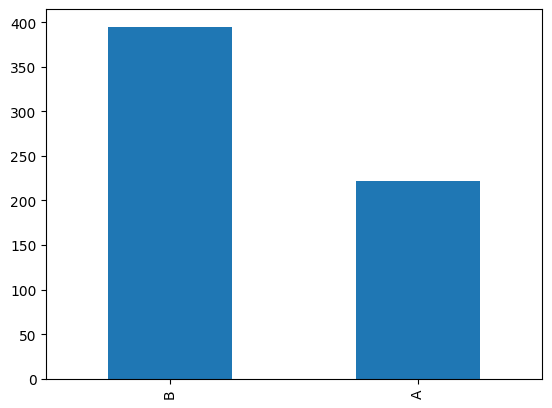

In [12]:
df_train['EJ'].value_counts().plot.bar()

## Numeric data

There are too many numeric columns and they all have different properties. Let's make diagrams for the first 10

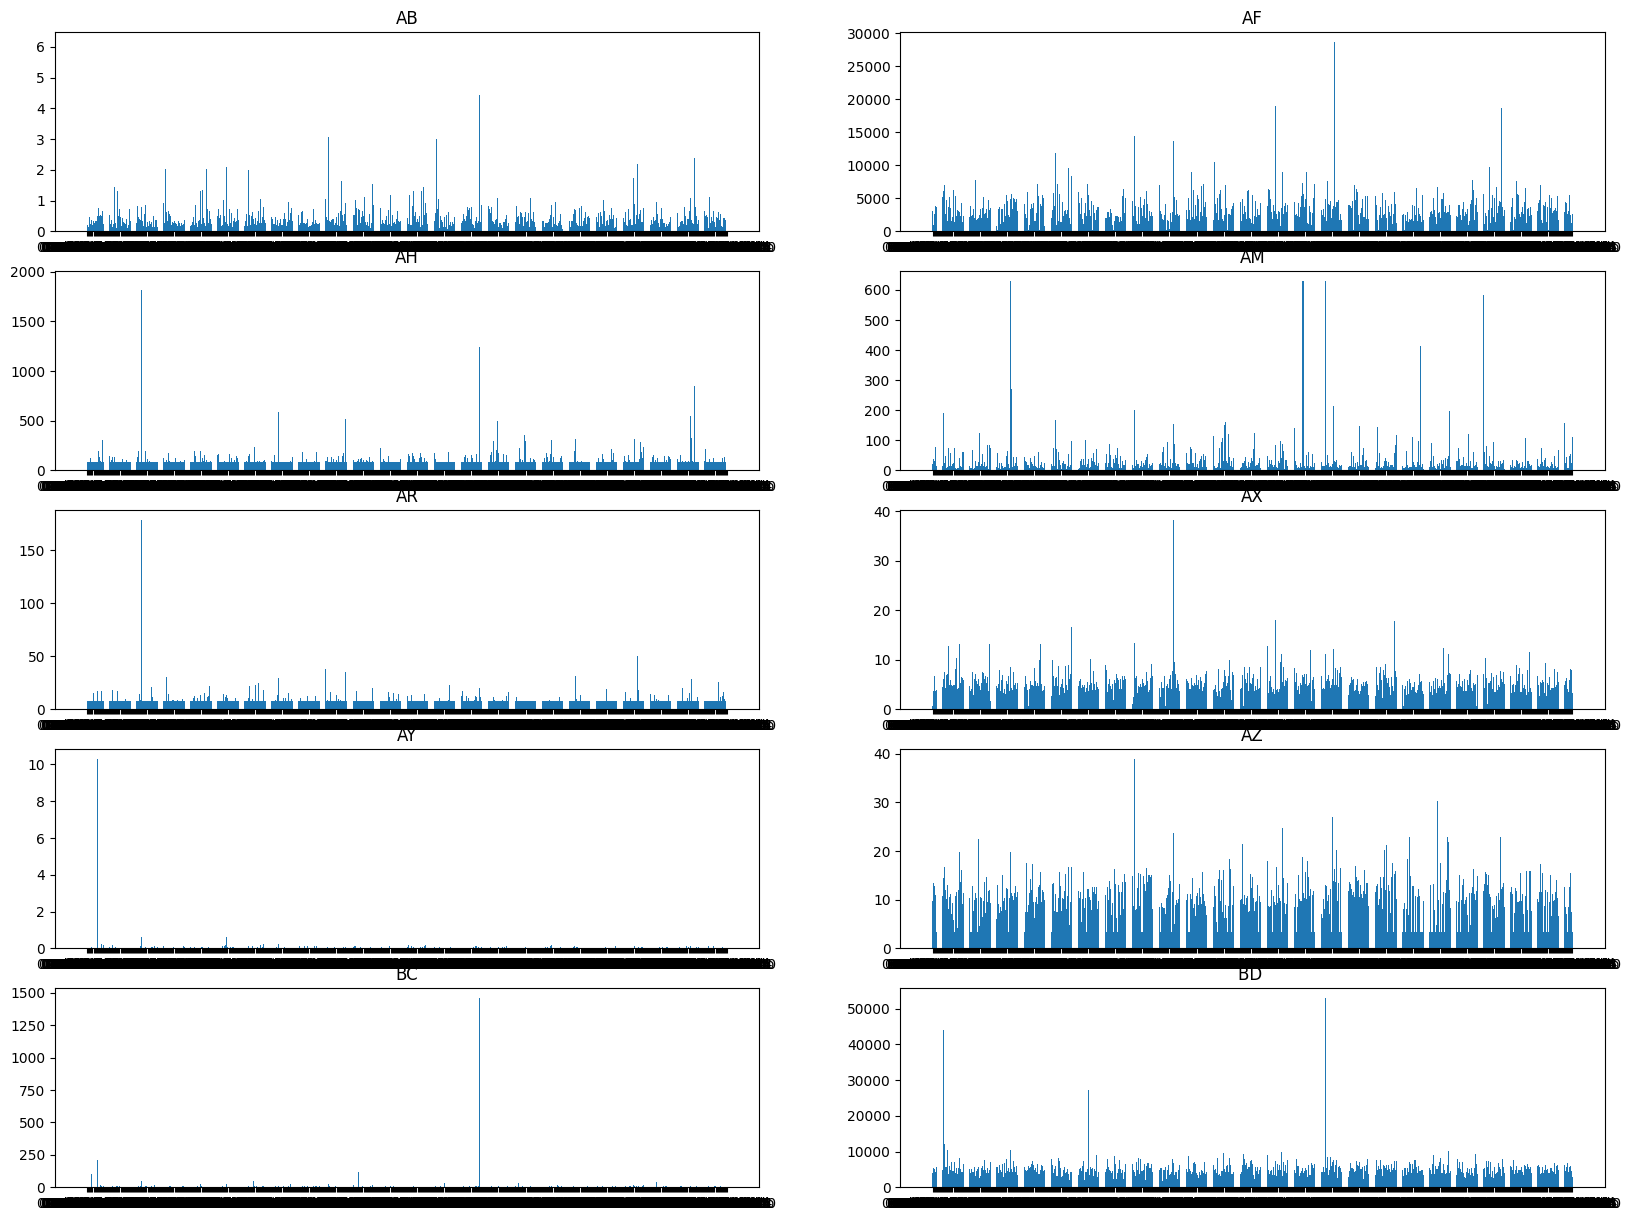

In [13]:
columns_name = [i for i in df_train.columns if i not in ["Id", "EJ", "Class"]]
figure, axis = plt.subplots(5, 2, figsize=(20, 15))

for i, column_name in enumerate(columns_name[:10]):
    row = i//2
    col = i % 2
    axis[row, col].bar(x=df_train['Id'], height=df_train[column_name])
    axis[row, col].set_title(column_name)
plt.show()

## Overall statistics

In [14]:
df_train.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


Columns with empty values are present. Let's take a closer look at them

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

All columns, except for BQ and EL, have less than 1% of nan cells, so we can drop them. But BQ and EL have almost 10% of nan values. More exploration is needed.

In [27]:
def is_above_zero(pair):
    key, value = pair
    return value > 0
res = {}
for c in df_train.columns:
  res[c] = df_train[c].isna().sum()/len(df_train)*100

columns_above_zero = dict(filter(is_above_zero, res.items()))
columns_above_zero

{'BQ': 9.724473257698541,
 'CB': 0.3241491085899514,
 'CC': 0.48622366288492713,
 'DU': 0.1620745542949757,
 'EL': 9.724473257698541,
 'FC': 0.1620745542949757,
 'FL': 0.1620745542949757,
 'FS': 0.3241491085899514,
 'GL': 0.1620745542949757}

In [34]:
df_train.dropna(subset=['CB', 'CC', 'DU','FC','FS','GL'], inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      612 non-null    object 
 1   AB      612 non-null    float64
 2   AF      612 non-null    float64
 3   AH      612 non-null    float64
 4   AM      612 non-null    float64
 5   AR      612 non-null    float64
 6   AX      612 non-null    float64
 7   AY      612 non-null    float64
 8   AZ      612 non-null    float64
 9   BC      612 non-null    float64
 10  BD      612 non-null    float64
 11  BN      612 non-null    float64
 12  BP      612 non-null    float64
 13  BQ      554 non-null    float64
 14  BR      612 non-null    float64
 15  BZ      612 non-null    float64
 16  CB      612 non-null    float64
 17  CC      612 non-null    float64
 18  CD      612 non-null    float64
 19  CF      612 non-null    float64
 20  CH      612 non-null    float64
 21  CL      612 non-null    float64
 22  CR

(<Axes: >,
 count    557.000000
 mean      98.328737
 std       96.479371
 min        1.331155
 25%       27.834425
 50%       61.642115
 75%      134.009015
 max      344.644105
 Name: BQ, dtype: float64)

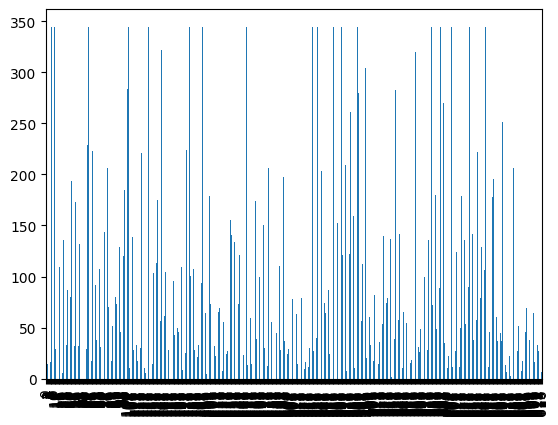

In [31]:
df_train['BQ'].plot.bar(), df_train['BQ'].describe()

(<Axes: >,
 count    557.000000
 mean      69.582596
 std       38.555707
 min        5.394675
 25%       30.927468
 50%       71.949306
 75%      109.125159
 max      109.125159
 Name: EL, dtype: float64)

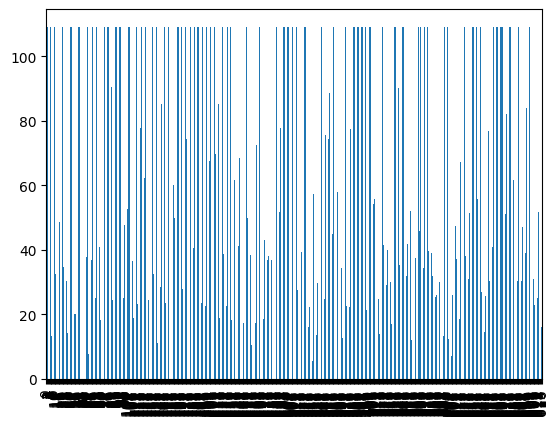

In [32]:
df_train['EL'].plot.bar(), df_train['EL'].describe()

Fill empty cells with mean

In [36]:
df_train[['BQ', 'EL']] = df_train[['BQ', 'EL']].fillna(df_train[['BQ', 'EL']].mean())